### <a href="https://colab.research.google.com/github/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Assesment/LaboratorioFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio final.
## Aprendizaje estadístico.

Los siguientes dataset (DataTrain,DataTest)contiene información para entrenar un modelo y realizar la predecicción de la diferencia  del  consumo de combustible en barcos, su tarea será encontrar el mejor modelo que permita determinar la diferencia del contador de flujo de combustible, empleando los datos suministrados en el dataset de nombre DataTest.


La descripcion de los dataset son dadas a continuación:

- El  dataset [DataTrain](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTrain.xlsx)
 contiene datos para las  variables : Date	Latitude_degree	Longitude_degree	Beaufort	Speed(Ground)	M/E REVOLUTION	M/E F O FLOW COUNTER,  






- El dataset [DataTrainVyg](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/Data_trainVyg.xlsx)
, contiene datos de Date(UTC)	DRAFT.

- El dataset [DataTest](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/datasets/DataTest.xlsx)
, es el dataset con el que probarás tu modelo después de ser entrenado.

La descripción de las variables son las siguientes:


- Date: Es la fecha en que se registraron los datos

- Latitude_degree: Es la coordenada que indica la posición norte o sur de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el ecuador (0°) hasta los polos (90° o -90°). Por ejemplo, la latitud de Medellín es 6.244° N.

- Longitude_degree: Es la coordenada que indica la posición este o oeste de un punto en la superficie de la Tierra o de otro cuerpo celeste. Se mide en grados, minutos y segundos o en grados decimales, desde el meridiano de Greenwich (0°) hasta los antimeridianos (180° o -180°). Por ejemplo, la longitud de Medellín es 75.574° W.


- Beaufort: Es una escala que mide la intensidad del viento basándose en el estado del mar o en los efectos del viento sobre la superficie terrestre. Tiene 13 niveles, desde 0 (calma) hasta 12 (huracán). Por ejemplo, un viento de fuerza 5 en la escala de Beaufort tiene una velocidad de 29 a 38 km/h y produce olas moderadas.


- Speed(Ground): Es la velocidad a la que se desplaza un objeto sobre la superficie terrestre, normalmente en kilómetros por hora (km/h) o en nudos (kt). Por ejemplo, la velocidad de un avión comercial puede ser de unos 900 km/h o 486 kt.


- M/E REVOLUTION : Es la velocidad angular o número de revoluciones por minuto (rpm) de un motor eléctrico o de una máquina. Por ejemplo, un motor eléctrico puede tener una velocidad de 1800 rpm.


- DRAFT: Es la profundidad vertical de un barco o de otro objeto flotante desde la línea de flotación hasta el fondo de la quilla. Se mide normalmente en metros (m) o en pies (ft). Por ejemplo, el calado de un portaaviones puede ser de unos 12 m o 39 ft.


- M/E F O FLOW COUNTER: Es el contador que mide el flujo de combustible (fuel oil) que entra o sale de un motor eléctrico o de una máquina. Por ejemplo, un contador puede registrar que un motor consume 10 litros de combustible por hora.



In [1]:
import numpy as np
import pandas as pd

Exportamos los datos


In [2]:
url_train = 'https://github.com/hernansalinas/Curso_aprendizaje_estadistico/raw/main/datasets/DataTrain.xlsx'
url_trainVyG = 'https://github.com/hernansalinas/Curso_aprendizaje_estadistico/raw/main/datasets/Data_trainVyg.xlsx'
url_test = 'https://github.com/hernansalinas/Curso_aprendizaje_estadistico/raw/main/datasets/DataTest.xlsx'

df_train = pd.read_excel(url_train, engine='openpyxl')
df_trainVyG = pd.read_excel(url_trainVyG)
df_test = pd.read_excel(url_test, engine='openpyxl')

In [3]:
df_train

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03 01:00:00,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03 02:00:00,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03 03:00:00,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03 04:00:00,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03 05:00:00,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...
19995,2018-11-27 05:00:00,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27 06:00:00,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27 07:00:00,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27 08:00:00,34.751111,137.317500,low,0.0,0,5165079


Cambiamos el formato de la columna Date, y dividimos esta en dos columnas nuevas 'Date' y 'Hour'

In [4]:
df_train['Date'] = pd.to_datetime(df_train['Date'])  # Asegúrate de convertir a tipo datetime si aún no lo es

# Crea nuevas columnas 'fecha' y 'hora'
df_train.insert(1,'Hour',df_train['Date'].dt.hour)
df_train['Date'] = df_train['Date'].dt.date

In [5]:
df_train

,Date,Hour,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER
0,2016-06-03,1,35.175000,141.595556,medium,17.5,86,2531274
1,2016-06-03,2,35.315833,141.884444,medium,18.3,86,2531443
2,2016-06-03,3,35.458333,142.121111,medium,18.4,86,2531608
3,2016-06-03,4,35.573611,142.548611,medium,18.1,86,2531771
4,2016-06-03,5,35.939722,142.768889,medium,18.8,86,2531934
...,...,...,...,...,...,...,...,...
19995,2018-11-27,5,34.751111,137.318333,low,0.0,0,5165079
19996,2018-11-27,6,34.750556,137.317778,low,0.0,0,5165079
19997,2018-11-27,7,34.750833,137.317500,low,0.0,0,5165079
19998,2018-11-27,8,34.751111,137.317500,low,0.0,0,5165079


In [6]:
df_trainVyG

,vyg,Date(UTC),DRAFT
0,0,2016060301,9.175
1,1,2016062500,9.250
2,2,2016062700,9.365
3,3,2016062901,8.645
4,4,2016070600,7.805
...,...,...,...
106,106,2019042101,7.425
107,107,2019042309,9.335
108,108,2019050700,9.240
109,109,2019052101,7.435


Igualmente hacemos para el dataframe df_trainVyG

In [7]:
df_trainVyG['Date(UTC)'] = pd.to_datetime(df_trainVyG['Date(UTC)'], format='%Y%m%d%H')

# Crea nuevas columnas 'fecha' y 'hora'
df_trainVyG.insert(2,'Hour',df_trainVyG['Date(UTC)'].dt.time)
df_trainVyG['Date(UTC)'] = df_trainVyG['Date(UTC)'].dt.date

In [8]:
df_trainVyG

,vyg,Date(UTC),Hour,DRAFT
0,0,2016-06-03,01:00:00,9.175
1,1,2016-06-25,00:00:00,9.250
2,2,2016-06-27,00:00:00,9.365
3,3,2016-06-29,01:00:00,8.645
4,4,2016-07-06,00:00:00,7.805
...,...,...,...,...
106,106,2019-04-21,01:00:00,7.425
107,107,2019-04-23,09:00:00,9.335
108,108,2019-05-07,00:00:00,9.240
109,109,2019-05-21,01:00:00,7.435


In [9]:
df_trainVyG = df_trainVyG.rename(columns={'Date(UTC)': 'Date'})

In [10]:
df_trainVyG

,vyg,Date,Hour,DRAFT
0,0,2016-06-03,01:00:00,9.175
1,1,2016-06-25,00:00:00,9.250
2,2,2016-06-27,00:00:00,9.365
3,3,2016-06-29,01:00:00,8.645
4,4,2016-07-06,00:00:00,7.805
...,...,...,...,...
106,106,2019-04-21,01:00:00,7.425
107,107,2019-04-23,09:00:00,9.335
108,108,2019-05-07,00:00:00,9.240
109,109,2019-05-21,01:00:00,7.435


Hacemos el merge entre ambos dataframes

In [11]:
df_merge = pd.merge(df_train, df_trainVyG, on='Date', how='left')

In [12]:
df_merge

,Date,Hour_x,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,Hour_y,DRAFT
0,2016-06-03,1,35.175000,141.595556,medium,17.5,86,2531274,0.0,01:00:00,9.175
1,2016-06-03,2,35.315833,141.884444,medium,18.3,86,2531443,0.0,01:00:00,9.175
2,2016-06-03,3,35.458333,142.121111,medium,18.4,86,2531608,0.0,01:00:00,9.175
3,2016-06-03,4,35.573611,142.548611,medium,18.1,86,2531771,0.0,01:00:00,9.175
4,2016-06-03,5,35.939722,142.768889,medium,18.8,86,2531934,0.0,01:00:00,9.175
...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27,5,34.751111,137.318333,low,0.0,0,5165079,NaN,NaN,NaN
19996,2018-11-27,6,34.750556,137.317778,low,0.0,0,5165079,NaN,NaN,NaN
19997,2018-11-27,7,34.750833,137.317500,low,0.0,0,5165079,NaN,NaN,NaN
19998,2018-11-27,8,34.751111,137.317500,low,0.0,0,5165079,NaN,NaN,NaN


Rellenamos los elementos de la columna DRAFT de modo que suponemos que la cantidad que se sumerge el barco no cambia mientras el barco viaja de puerto a puerto. Es decir que en los días siguientes a la fecha de embarque el barco no cambia su carga a menos de que cargue o descargue en un nuevo puerto

In [13]:
df_merge.fillna(method = 'ffill', inplace = True)
df_merge.drop('Hour_y',axis = 1)

,Date,Hour_x,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT
0,2016-06-03,1,35.175000,141.595556,medium,17.5,86,2531274,0.0,9.175
1,2016-06-03,2,35.315833,141.884444,medium,18.3,86,2531443,0.0,9.175
2,2016-06-03,3,35.458333,142.121111,medium,18.4,86,2531608,0.0,9.175
3,2016-06-03,4,35.573611,142.548611,medium,18.1,86,2531771,0.0,9.175
4,2016-06-03,5,35.939722,142.768889,medium,18.8,86,2531934,0.0,9.175
...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27,5,34.751111,137.318333,low,0.0,0,5165079,90.0,7.610
19996,2018-11-27,6,34.750556,137.317778,low,0.0,0,5165079,90.0,7.610
19997,2018-11-27,7,34.750833,137.317500,low,0.0,0,5165079,90.0,7.610
19998,2018-11-27,8,34.751111,137.317500,low,0.0,0,5165079,90.0,7.610


Creamos la columna de Diff, como la diferencia del contador del flujo de combustible

In [14]:
df_merge['Diff'] = df_merge['M/E F O FLOW COUNTER'].diff()

In [15]:
df_merge

,Date,Hour_x,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,Hour_y,DRAFT,Diff
0,2016-06-03,1,35.175000,141.595556,medium,17.5,86,2531274,0.0,01:00:00,9.175,NaN
1,2016-06-03,2,35.315833,141.884444,medium,18.3,86,2531443,0.0,01:00:00,9.175,169.0
2,2016-06-03,3,35.458333,142.121111,medium,18.4,86,2531608,0.0,01:00:00,9.175,165.0
3,2016-06-03,4,35.573611,142.548611,medium,18.1,86,2531771,0.0,01:00:00,9.175,163.0
4,2016-06-03,5,35.939722,142.768889,medium,18.8,86,2531934,0.0,01:00:00,9.175,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27,5,34.751111,137.318333,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19996,2018-11-27,6,34.750556,137.317778,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19997,2018-11-27,7,34.750833,137.317500,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19998,2018-11-27,8,34.751111,137.317500,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0


Graficamos el valor de Diff por cada hora

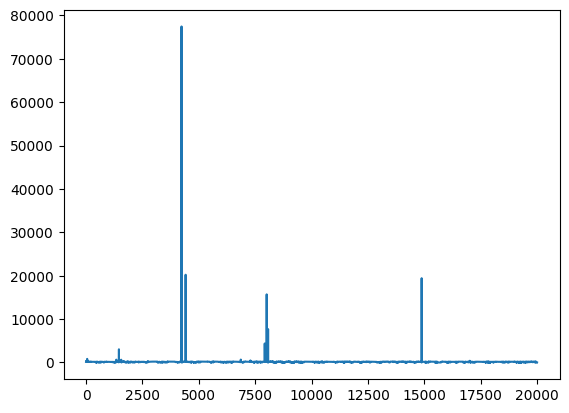

In [16]:
import matplotlib.pyplot as plt


plt.plot(df_merge.index,df_merge['Diff'])

Notamos algunos outliers que se notan mejor en el boxplot

<Axes: title={'center': 'Diff'}, xlabel='Beaufort'>

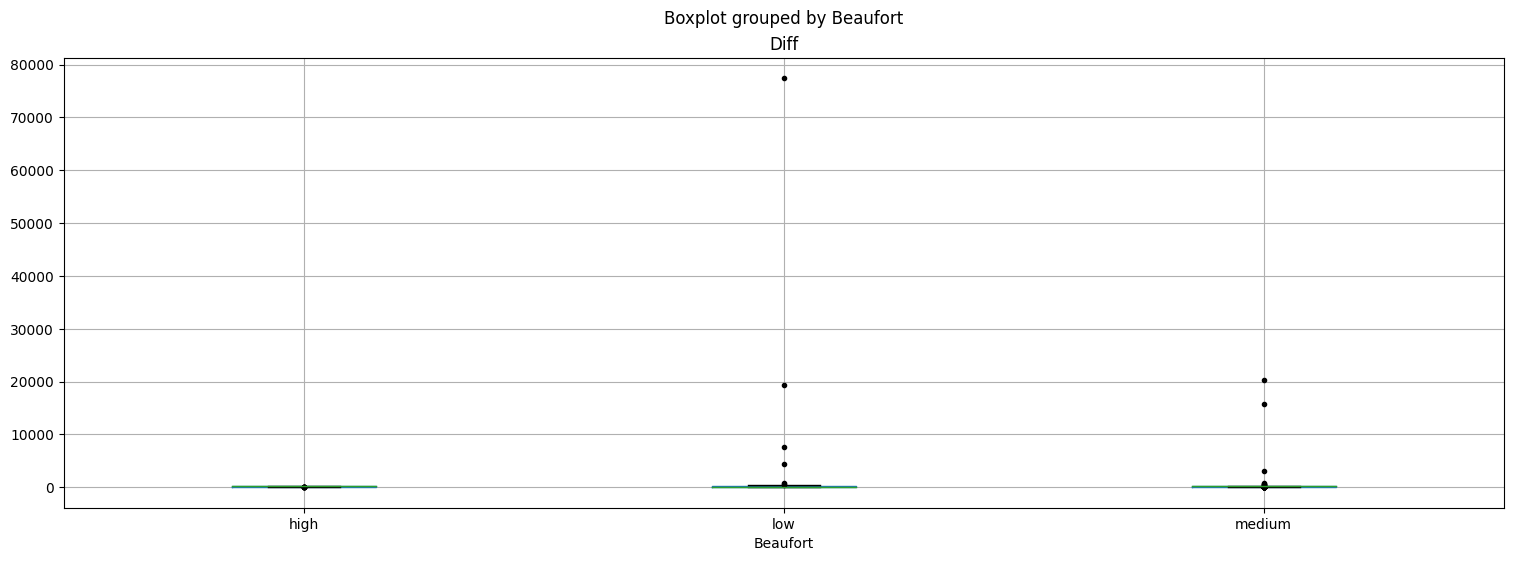

In [17]:
df_merge.boxplot(column="Diff", by='Beaufort', sym = 'k.', figsize=(18,6))

Eliminamos entonces los Outliers, aplicando un filtro mediante el rango intercuartílico

In [18]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_merge['Diff'].quantile(0.25)
Q3 = df_merge['Diff'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
df_filtered = df_merge[(df_merge['Diff'] >= lower_bound) & (df_merge['Diff'] <= upper_bound)]

<Axes: title={'center': 'Diff'}, xlabel='Beaufort'>

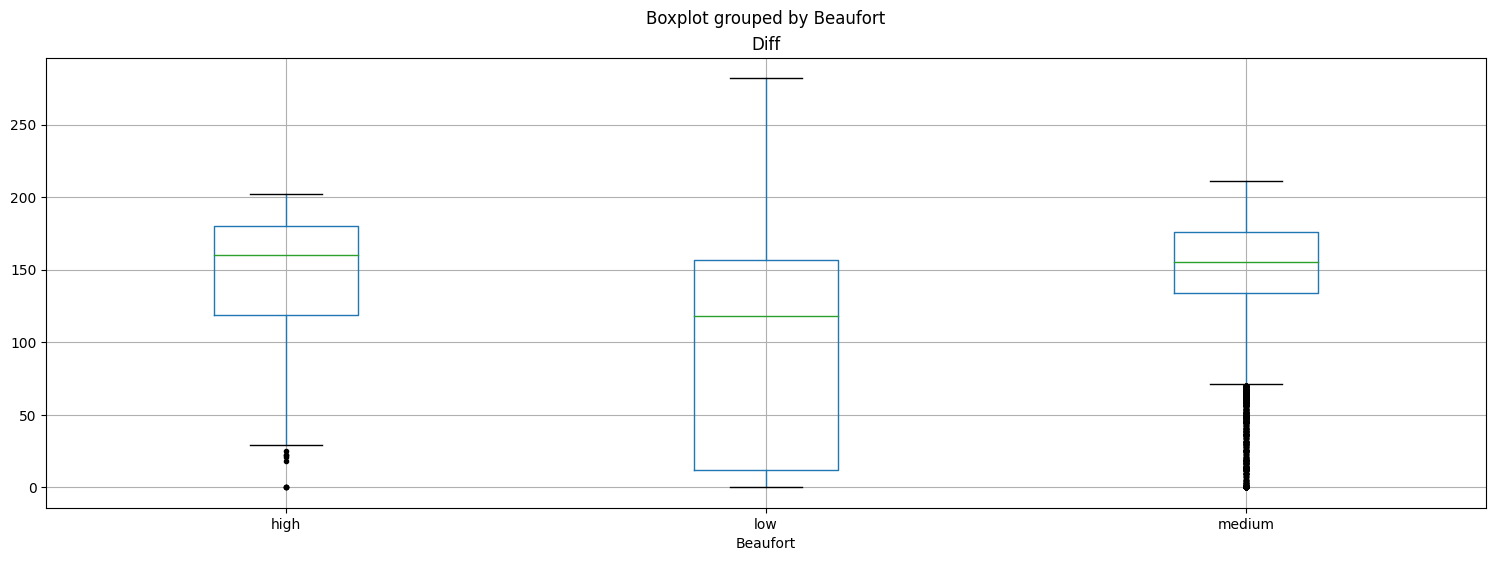

In [19]:
df_filtered.boxplot(column="Diff", by='Beaufort', sym = 'k.', figsize=(18,6))

(2500.0, 3600.0)

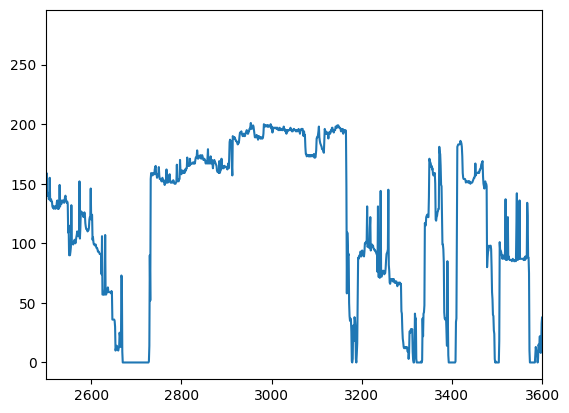

In [20]:
plt.plot(df_filtered.index,df_filtered['Diff'])
plt.xlim(2500, 3600)

Los puntos mínimos corresponden con horas en las que el barco no estuvo en movimiento

Analicemos ahora la correlación entre variables

In [21]:
df_filtered.corr()

<ipython-input-21-3b1745aa73cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filtered.corr()


,Hour_x,Latitude_degree,Longitude_degree,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,DRAFT,Diff
Hour_x,1.000000,0.000292,-0.001640,-0.013915,-0.013667,0.000789,-0.000347,0.001933,-0.009526
Latitude_degree,0.000292,1.000000,0.144379,-0.052173,-0.029394,0.283889,0.282633,0.143162,-0.008976
Longitude_degree,-0.001640,0.144379,1.000000,-0.146395,-0.129144,0.053866,0.052243,-0.145934,-0.099197
Speed(Ground),-0.013915,-0.052173,-0.146395,1.000000,0.982150,-0.082939,-0.082355,0.059254,0.911746
M/E REVOLUTION,-0.013667,-0.029394,-0.129144,0.982150,1.000000,-0.072607,-0.072767,0.092405,0.926155
M/E F O FLOW COUNTER,0.000789,0.283889,0.053866,-0.082939,-0.072607,1.000000,0.999177,0.053649,-0.044493
vyg,-0.000347,0.282633,0.052243,-0.082355,-0.072767,0.999177,1.000000,0.044918,-0.043192
DRAFT,0.001933,0.143162,-0.145934,0.059254,0.092405,0.053649,0.044918,1.000000,0.102508
Diff,-0.009526,-0.008976,-0.099197,0.911746,0.926155,-0.044493,-0.043192,0.102508,1.000000


<ipython-input-22-29a96a7e5357>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_filtered.corr(), annot = True)


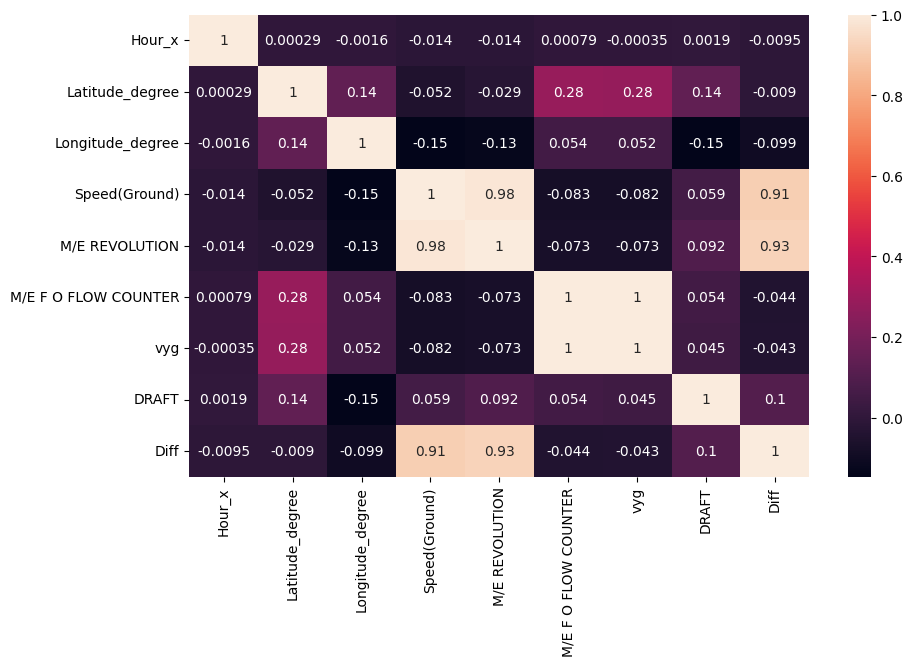

In [22]:
import seaborn as sns

plt.figure(figsize = (10,6))
sns.heatmap(df_filtered.corr(), annot = True)
plt.show()

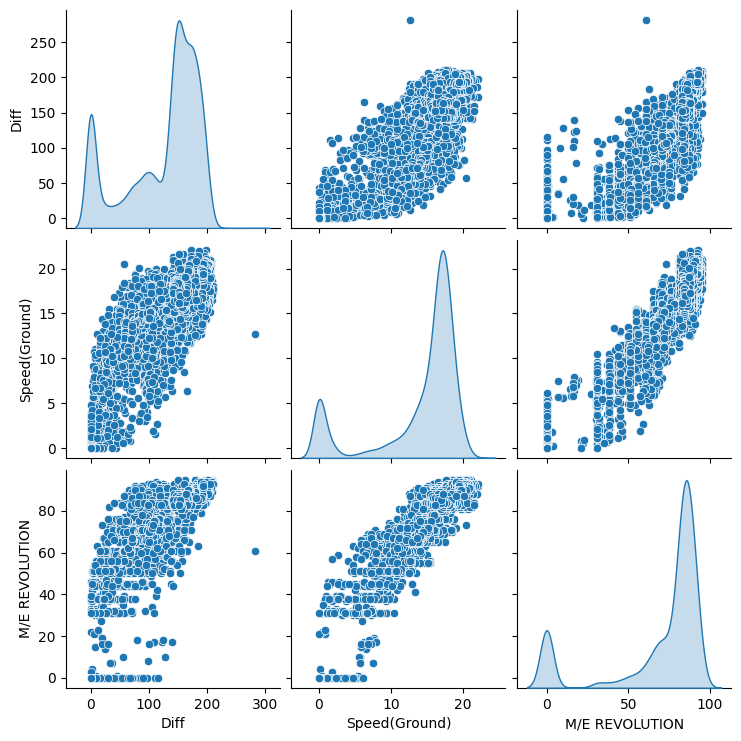

In [23]:
cols = ["Diff", "Speed(Ground)", "M/E REVOLUTION"]
#pd.plotting.scatter_matrix(df[cols], alpha = 0.2, figsize = (12,8))
g = sns.pairplot(df_filtered[cols], diag_kind="kde")

In [24]:
df_filtered

,Date,Hour_x,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION,M/E F O FLOW COUNTER,vyg,Hour_y,DRAFT,Diff
1,2016-06-03,2,35.315833,141.884444,medium,18.3,86,2531443,0.0,01:00:00,9.175,169.0
2,2016-06-03,3,35.458333,142.121111,medium,18.4,86,2531608,0.0,01:00:00,9.175,165.0
3,2016-06-03,4,35.573611,142.548611,medium,18.1,86,2531771,0.0,01:00:00,9.175,163.0
4,2016-06-03,5,35.939722,142.768889,medium,18.8,86,2531934,0.0,01:00:00,9.175,163.0
5,2016-06-03,6,36.068611,143.141667,low,19.6,86,2532095,0.0,01:00:00,9.175,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2018-11-27,5,34.751111,137.318333,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19996,2018-11-27,6,34.750556,137.317778,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19997,2018-11-27,7,34.750833,137.317500,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0
19998,2018-11-27,8,34.751111,137.317500,low,0.0,0,5165079,90.0,00:00:00,7.610,0.0


## Selección de características


*   La posición del barco podría proporcionar información valiosa sobre las condiciones del mar y del viento que afectan su desempeño. En consecuencia, podríamos observar un aumento razonable en la diferencia de flujo de combustible en conjunto con un aumento en las revoluciones del motor o una disminución en la velocidad del barco. Sin embargo, dado que ya tenemos características como Beaufort, M/E REVOLUTION y Speed(Ground) que capturan de manera efectiva estas condiciones y el rendimiento del barco, la inclusión adicional de la posición se vuelve redundante e innecesaria.

*   Al analizar la matriz de correlación, se destaca que las únicas variables que parecen tener una influencia directa sobre el valor de 'Diff' son 'Speed(Ground)' y 'M/E REVOLUTION'. No obstante, es importante señalar que 'DRAFT' también desempeña un papel significativo, ya que refleja la carga del barco. Es lógico suponer que a medida que aumenta la carga del barco (indicada por un mayor 'DRAFT'), el consumo de combustible puede incrementarse. Por lo tanto, 'DRAFT' debe considerarse como un factor importante en el análisis.

Aunque el DRAFT pueda ser relevante los datos del dataframe de test no tienen valores de DRAFT. Por ende no tiene sentido incluirlo como característica




In [25]:
cols = ['Beaufort','Speed(Ground)','M/E REVOLUTION','Diff']

df = df_filtered[cols]


In [26]:
df

,Beaufort,Speed(Ground),M/E REVOLUTION,Diff
1,medium,18.3,86,169.0
2,medium,18.4,86,165.0
3,medium,18.1,86,163.0
4,medium,18.8,86,163.0
5,low,19.6,86,161.0
...,...,...,...,...
19995,low,0.0,0,0.0
19996,low,0.0,0,0.0
19997,low,0.0,0,0.0
19998,low,0.0,0,0.0


In [27]:
from sklearn.preprocessing import OneHotEncoder


Beaufort = df[["Beaufort"]]
Beaufort_encoder = OneHotEncoder(sparse=False)
Beaufort_cat_1hot = Beaufort_encoder.fit_transform(Beaufort)
print(Beaufort_cat_1hot)
print(Beaufort_encoder.categories_)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[array(['high', 'low', 'medium'], dtype=object)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
df_cat_1hot = pd.DataFrame(Beaufort_cat_1hot, columns = Beaufort_encoder.categories_[0])
df_cat_1hot

,high,low,medium
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
19973,0.0,1.0,0.0
19974,0.0,1.0,0.0
19975,0.0,1.0,0.0
19976,0.0,1.0,0.0


In [29]:
df_num = df.drop("Beaufort", axis=1)

df_reset = df_num.reset_index(drop=True)



In [30]:
df_scale = df_reset.join(df_cat_1hot)
df_scale

,Speed(Ground),M/E REVOLUTION,Diff,high,low,medium
0,18.3,86,169.0,0.0,0.0,1.0
1,18.4,86,165.0,0.0,0.0,1.0
2,18.1,86,163.0,0.0,0.0,1.0
3,18.8,86,163.0,0.0,0.0,1.0
4,19.6,86,161.0,0.0,1.0,0.0
...,...,...,...,...,...,...
19973,0.0,0,0.0,0.0,1.0,0.0
19974,0.0,0,0.0,0.0,1.0,0.0
19975,0.0,0,0.0,0.0,1.0,0.0
19976,0.0,0,0.0,0.0,1.0,0.0


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_scale)

MinMaxScaler()

In [48]:
X = scaler.transform(df_scale)
X

array([[0.8280543 , 0.90526316, 0.59929078, 0.        , 0.        ,
        1.        ],
       [0.83257919, 0.90526316, 0.58510638, 0.        , 0.        ,
        1.        ],
       [0.81900452, 0.90526316, 0.57801418, 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [49]:
df_prepared = pd.DataFrame(X, columns = df_scale.columns)
df_prepared

,Speed(Ground),M/E REVOLUTION,Diff,high,low,medium
0,0.828054,0.905263,0.599291,0.0,0.0,1.0
1,0.832579,0.905263,0.585106,0.0,0.0,1.0
2,0.819005,0.905263,0.578014,0.0,0.0,1.0
3,0.850679,0.905263,0.578014,0.0,0.0,1.0
4,0.886878,0.905263,0.570922,0.0,1.0,0.0
...,...,...,...,...,...,...
19973,0.000000,0.000000,0.000000,0.0,1.0,0.0
19974,0.000000,0.000000,0.000000,0.0,1.0,0.0
19975,0.000000,0.000000,0.000000,0.0,1.0,0.0
19976,0.000000,0.000000,0.000000,0.0,1.0,0.0


In [50]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_prepared, test_size = 0.2, random_state = 42)

df_labels_train = df_train["Diff"].copy()
df_train = df_train.drop("Diff", axis=1)

df_labels_test = df_test["Diff"].copy()
df_test = df_test.drop("Diff", axis=1)

## Usando una modelo de Regresión Lineal simple

In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df_train, df_labels_train)


predictions = model.predict(df_test)

from sklearn.metrics import r2_score

r2_score(df_labels_test, predictions)

0.8651208592563543

## Usando una modelo de Support Vector Machine

In [52]:
from sklearn.svm import SVR

# Crear y entrenar el modelo SVM para regresión en el conjunto de entrenamiento
model_svm = SVR()
model_svm.fit(df_train, df_labels_train)

# Realizar predicciones en el conjunto de prueba
predictions_svm = model_svm.predict(df_test)

# Evaluar el rendimiento del modelo SVM en el conjunto de prueba
r2_svm = r2_score(df_labels_test, predictions_svm)
print(f'R² para SVM en el conjunto de prueba: {r2_svm}')

R² para SVM en el conjunto de prueba: 0.9245877110521072


## Usando Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Bosque Aleatorio en el conjunto de entrenamiento
model_rf = RandomForestRegressor()
model_rf.fit(df_train, df_labels_train)

# Realizar predicciones en el conjunto de prueba
predictions_rf = model_rf.predict(df_test)

# Evaluar el rendimiento del modelo de Bosque Aleatorio en el conjunto de prueba
r2_rf = r2_score(df_labels_test, predictions_rf)
print(f'R² para Bosque Aleatorio en el conjunto de prueba: {r2_rf}')

R² para Bosque Aleatorio en el conjunto de prueba: 0.9472808624860869


Notamos entonces que el mejor modelo que permite determinar la diferencia del contador de flujo de combustible es el Random Forest. Además se demuestra que la variabre DRAFT es realmente irrelevante

Etiquetemos ahora el dataframe de test

In [78]:
df_test = pd.read_excel(url_test, engine='openpyxl')
df_test

,Date,Latitude_degree,Longitude_degree,Beaufort,Speed(Ground),M/E REVOLUTION
0,2018-11-27 10:00:00,34.750556,137.318056,low,0.0,0
1,2018-11-27 11:00:00,34.751111,137.317222,low,0.0,0
2,2018-11-27 12:00:00,34.750556,137.317500,low,0.0,0
3,2018-11-27 13:00:00,34.751389,137.317500,low,0.0,0
4,2018-11-27 14:00:00,34.750833,137.317500,low,0.0,0
...,...,...,...,...,...,...
4424,2019-06-02 19:00:00,33.175278,-132.280278,medium,17.9,92
4425,2019-06-02 20:00:00,33.053056,-131.792500,medium,17.8,91
4426,2019-06-02 21:00:00,33.093333,-131.602500,medium,17.5,91
4427,2019-06-02 22:00:00,32.785000,-131.243333,medium,17.5,92


In [79]:
df_test = df_test[['Beaufort','Speed(Ground)','M/E REVOLUTION']]

In [80]:
Beaufort = df_test[["Beaufort"]]
Beaufort_encoder = OneHotEncoder(sparse=False)
Beaufort_cat_1hot = Beaufort_encoder.fit_transform(Beaufort)
print(Beaufort_cat_1hot)
print(Beaufort_encoder.categories_)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[array(['high', 'low', 'medium'], dtype=object)]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
df_cat_1hot = pd.DataFrame(Beaufort_cat_1hot, columns = Beaufort_encoder.categories_[0])
df_cat_1hot

,high,low,medium
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4424,0.0,0.0,1.0
4425,0.0,0.0,1.0
4426,0.0,0.0,1.0
4427,0.0,0.0,1.0


In [82]:
df_num_test = df_test.drop("Beaufort", axis=1)

df_reset_test = df_num_test.reset_index(drop=True)

df_scale_test = df_reset_test.join(df_cat_1hot)

scaler2 = MinMaxScaler()
scaler2.fit(df_scale_test)

X_test = scaler2.transform(df_scale_test)

df_prepared_test = pd.DataFrame(X_test, columns = df_scale_test.columns)

In [83]:
df_prepared_test

,Speed(Ground),M/E REVOLUTION,high,low,medium
0,0.000000,0.000000,0.0,1.0,0.0
1,0.000000,0.000000,0.0,1.0,0.0
2,0.000000,0.000000,0.0,1.0,0.0
3,0.000000,0.000000,0.0,1.0,0.0
4,0.000000,0.000000,0.0,1.0,0.0
...,...,...,...,...,...
4424,0.860577,0.968421,0.0,0.0,1.0
4425,0.855769,0.957895,0.0,0.0,1.0
4426,0.841346,0.957895,0.0,0.0,1.0
4427,0.841346,0.968421,0.0,0.0,1.0


In [85]:
predicciones = model_rf.predict(df_prepared_test)

df_prepared_test.insert(loc=2, column='Diff', value=predicciones)


In [86]:
df_prepared_test

,Speed(Ground),M/E REVOLUTION,Diff,high,low,medium
0,0.000000,0.000000,0.001494,0.0,1.0,0.0
1,0.000000,0.000000,0.001494,0.0,1.0,0.0
2,0.000000,0.000000,0.001494,0.0,1.0,0.0
3,0.000000,0.000000,0.001494,0.0,1.0,0.0
4,0.000000,0.000000,0.001494,0.0,1.0,0.0
...,...,...,...,...,...,...
4424,0.860577,0.968421,0.658229,0.0,0.0,1.0
4425,0.855769,0.957895,0.664007,0.0,0.0,1.0
4426,0.841346,0.957895,0.662124,0.0,0.0,1.0
4427,0.841346,0.968421,0.659915,0.0,0.0,1.0


In [87]:
df_original = pd.DataFrame(scaler.inverse_transform(df_prepared_test), columns=df_prepared_test.columns)

Se imprime el dataframe con sus etiquetas en la escala original

In [88]:
df_original

,Speed(Ground),M/E REVOLUTION,Diff,high,low,medium
0,0.00000,0.0,0.421363,0.0,1.0,0.0
1,0.00000,0.0,0.421363,0.0,1.0,0.0
2,0.00000,0.0,0.421363,0.0,1.0,0.0
3,0.00000,0.0,0.421363,0.0,1.0,0.0
4,0.00000,0.0,0.421363,0.0,1.0,0.0
...,...,...,...,...,...,...
4424,19.01875,92.0,185.620592,0.0,0.0,1.0
4425,18.91250,91.0,187.250041,0.0,0.0,1.0
4426,18.59375,91.0,186.718994,0.0,0.0,1.0
4427,18.59375,92.0,186.095908,0.0,0.0,1.0
